# Word2Vec using Gensim

### 2017 Dec Shilpa Jain

## Read input file which is a csv containing 5 documents, each per row

In [1]:
# The code was removed by DSX for sharing.

,Text
0,"The ""Big Brother"" of Singapore football will b..."
1,Mahfizur Rahman watched his friends turn to cr...
2,"The going has been tough, but the Football Ass..."
3,Having pushed reigning world and European cham...
4,SINGAPORE - Registration for the Standard Char...


## Convert each doc into list of tokens and append it to a list

In [2]:
import nltk
docs=[]
for idx, row in df_data_1.iterrows():
    #print (row['Text'])
    
    tokens = nltk.word_tokenize(row['Text'])
    text = nltk.Text(tokens)
    docs.append(tokens)
print ((docs))
    

[['The', '``', 'Big', 'Brother', "''", 'of', 'Singapore', 'football', 'will', 'be', 'back', ',', 'but', 'not', 'immediately', ',', 'and', 'not', 'for', 'long', '.', 'In', 'an', 'exclusive', 'interview', 'with', 'The', 'New', 'Paper', ',', 'Persib', 'Bandung', 'striker', 'Noh', 'Alam', 'Shah', 'said', 'he', 'has', 'agreed', 'to', 'sign', 'a', 'short-term', 'deal', 'with', 'former', 'club', 'Tampines', 'Rovers', 'until', 'the', 'end', 'of', 'the', 'season', '.', 'But', 'the', '31-year-old', 'said', ':', '``', 'Beyond', 'that', ',', 'I', 'feel', 'my', 'future', 'is', 'still', 'in', 'Indonesia', '.', '``', 'I', 'feel', 'really', 'appreciated', 'here', '.', 'Four', 'Indo', 'clubs', 'already', 'made', 'me', 'offers', 'for', 'the', 'next', 'season', ',', 'which', 'starts', 'next', 'January', '.', "''", 'The', 'move', 'to', 'Singapore', 'still', 'hinges', 'on', 'whether', 'Tampines', 'can', 'secure', 'his', 'medical', 'documents', 'and', 'International', 'Transfer', 'Certificate', 'from', 'the

In [3]:
from nltk.corpus import stopwords
from nltk.stem.porter import *
stemmer=PorterStemmer()
import gensim
from gensim import corpora
from gensim import similarities
from gensim import models


def tolower(docs):
    docs=[[w.lower() for w in doc] for doc in docs]
    return docs
    
def fetchdictionary(docs):
    dictionary=corpora.Dictionary(docs)
    return dictionary

def removestop(docs):
    stop_list=stopwords.words('english')
    docs=[[w for w in doc if w not in stop_list] for doc in docs]
    return docs;

def stemwords(docs):
    docs=[[stemmer.stem(w) for w in doc] for doc in docs]
    
    #text2_stemmed=[stemmer.stem(w) for w in wordlist]
    return docs;

def convertToVec(docs,dictionary):
    vecs=[dictionary.doc2bow(doc) for doc in docs]
    return vecs

def buildindex(docs):
    index=similarities.SparseMatrixSimilarity(docs,110)
    return index;

def createtdif(docs):
    tfidf=models.TfidfModel(docs)
    return tfidf

In [4]:
docs=tolower(docs)
#print(docs)
#Remove stop words
docs=removestop(docs)
#Perform stemming
docs=stemwords(docs)

#Create dictionary
dictionary=fetchdictionary(docs)
print (dictionary)
token_to_id=dictionary.token2id
#Convert to vector
#print (type(docs))
vecs=convertToVec(docs,dictionary)
print (vecs)
#Build index for finding similarity
index=buildindex(vecs)
#print(index)

tdif=createtdif(vecs)
print (tdif)

Dictionary(735 unique tokens: ['main', 'better', 'menac', 'averag', 'thailand']...)
[[(0, 3), (1, 1), (2, 2), (3, 1), (4, 1), (5, 1), (6, 2), (7, 3), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 2), (15, 14), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 2), (22, 1), (23, 4), (24, 6), (25, 1), (26, 1), (27, 1), (28, 1), (29, 3), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 3), (36, 1), (37, 1), (38, 1), (39, 2), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 3), (50, 1), (51, 1), (52, 5), (53, 1), (54, 1), (55, 1), (56, 8), (57, 3), (58, 1), (59, 1), (60, 1), (61, 1), (62, 2), (63, 2), (64, 1), (65, 1), (66, 1), (67, 2), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 2), (74, 1), (75, 1), (76, 1), (77, 1), (78, 2), (79, 1), (80, 1), (81, 1), (82, 1), (83, 2), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 4), (94, 1), (95, 7), (96, 1), (97, 1), (98, 1), (99, 30), (100, 1), (101, 1), (1

## Create Word2Vec model with input as docs

In [13]:
from gensim.models import Word2Vec
model = gensim.models.Word2Vec(docs, min_count=3,size=100,workers=4)
X=model[model.wv.vocab]
#words=list(model.wv.vocab)
print (model)

Word2Vec(vocab=108, size=100, alpha=0.025)


## The trained model can be used for determining things such as similarity index, getting word vectors for a word, picking odd one out, probability of a text under the model and so on.

In [8]:
print(model.similarity('match', 'play'))
print (model.most_similar('sports'))

0.107859238139


## Visualizing Word embedding model

### Plot word vectors using PCA

In [18]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
result=pca.fit_transform(X)
print (result)

[[ -3.65083362e-03   7.69583043e-03]
 [  9.32000298e-03   4.23693843e-03]
 [ -2.56922306e-03  -3.31254487e-05]
 [ -1.69264572e-03   6.04160223e-03]
 [  1.40973879e-02   5.21469722e-03]
 [ -6.65097451e-03  -2.08440027e-03]
 [  1.25034607e-03  -1.17872516e-02]
 [  3.32620519e-04  -5.55586256e-03]
 [  9.57104098e-03   1.95510313e-03]
 [ -4.08235908e-04   4.35101427e-03]
 [  1.25343900e-03  -5.69994049e-03]
 [  7.83040747e-03   9.28678270e-03]
 [ -2.19470914e-03   2.98930187e-04]
 [ -7.22878519e-03  -9.96610848e-04]
 [  4.57428470e-02  -1.79871335e-03]
 [ -1.44134974e-03  -2.00674310e-03]
 [ -1.36402086e-03   6.75442722e-03]
 [ -2.95716804e-03  -6.29577972e-03]
 [ -6.70032063e-03  -3.45177157e-03]
 [  3.66607402e-03  -8.13059881e-03]
 [ -5.58262225e-03   5.98848844e-03]
 [  1.74425449e-03  -9.07739624e-03]
 [ -6.98545016e-03  -3.71407950e-03]
 [ -4.43475787e-03   2.58417521e-03]
 [ -2.98603950e-03  -8.46612081e-03]
 [ -5.43944957e-03  -1.02396281e-02]
 [ -4.37739259e-03   5.61989145e-03]
 

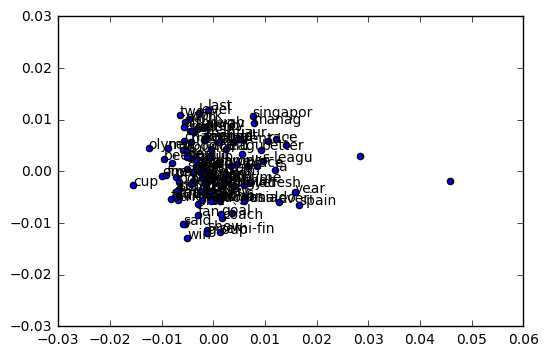

In [15]:
from matplotlib import pyplot
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

## Plotting using Bokeh which is more interactive

In [22]:
from bokeh.plotting import figure, show
from bokeh.io import push_notebook, output_notebook
from bokeh.models import ColumnDataSource, LabelSet

In [23]:
def interactive_tsne(text_labels, tsne_array):
    '''makes an interactive scatter plot with text labels for each point'''

    # define a dataframe to be used by bokeh context
    bokeh_df = pd.DataFrame(tsne_array, text_labels, columns=['x','y'])
    bokeh_df['text_labels'] = bokeh_df.index

    # interactive controls to include to the plot
    TOOLS="hover, zoom_in, zoom_out, box_zoom, undo, redo, reset, box_select"

    p = figure(tools=TOOLS, plot_width=700, plot_height=700)

    # define data source for the plot
    source = ColumnDataSource(bokeh_df)

    # scatter plot
    p.scatter('x', 'y', source=source, fill_alpha=0.6,
              fill_color="#8724B5",
              line_color=None)

    # text labels
    labels = LabelSet(x='x', y='y', text='text_labels', y_offset=8,
                      text_font_size="8pt", text_color="#555555",
                      source=source, text_align='center')

    p.add_layout(labels)

    # show plot inline
    output_notebook()
    show(p)

In [24]:
interactive_tsne(model.wv.vocab.keys(),result)

Loading BokehJS ...